# Predicting Employee Productivity

A project with an aim to practice Decision Tree and Random Forest modelling in python.

Dataset *Productivity Prediction of Garment Employees* comes from [UCI Machine learning Repository ](https://archive.ics.uci.edu/ml/datasets/Productivity+Prediction+of+Garment+Employees)

## Exploring the Dataset

In [1]:
import pandas as pd

df = pd.read_csv('garments_worker_productivity.csv')

In [2]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [4]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


There are 1197 observations.

There are null values only in the "wip" column.

In [5]:
df['date'].head()

0    1/1/2015
1    1/1/2015
2    1/1/2015
3    1/1/2015
4    1/1/2015
Name: date, dtype: object

In [6]:
df['date'].tail()

1192    3/11/2015
1193    3/11/2015
1194    3/11/2015
1195    3/11/2015
1196    3/11/2015
Name: date, dtype: object

Observations take place from the 1st of January, 2015 untill 11 of March, 2015.

In [7]:
df['quarter'].value_counts()

Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64

In [8]:
df.loc[df['quarter']=='Quarter5', 'date'].value_counts()

1/31/2015    24
1/29/2015    20
Name: date, dtype: int64

The 5th quarter has very few observations which all occured on days 

In [9]:
df['department'].value_counts()

sweing        691
finishing     257
finishing     249
Name: department, dtype: int64

Seems there is an error in the trunscribing of the "finishing". We will have to fix it.

In [10]:
df['day'].value_counts()

Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: day, dtype: int64

The factory doesn't work on fridays.

In [11]:
df["team"].value_counts().sort_index()

1     105
2     109
3      95
4     105
5      93
6      94
7      96
8     109
9     104
10    100
11     88
12     99
Name: team, dtype: int64

In [12]:
len(df[df["actual_productivity"] > df["targeted_productivity"]])

869

In [13]:
len(df[df["actual_productivity"] < df["targeted_productivity"]])

322

Actual productivity surpasses the targeted pruductivity in almost 2/3 of cases.

In [14]:
len(df[df['over_time']==0])

31

In [15]:
len(df[(df['over_time']==0) & (df["actual_productivity"] > df["targeted_productivity"])])

24

It´s almost impossible to fulfill the objective without overtime.

In [16]:
len(df[df['incentive']==0])

604

More than 50% of observations have no incentive.

In [17]:
len(df[(df["idle_time"] > 0)])

18

In [19]:
df[(df["idle_time"] > 0) & (df["idle_men"] == 0)]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity


There have been only 18 interruptions in the working process

In [20]:
df["no_of_style_change"].describe()

count    1197.000000
mean        0.150376
std         0.427848
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: no_of_style_change, dtype: float64

In [21]:
df["no_of_style_change"].value_counts()

0    1050
1     114
2      33
Name: no_of_style_change, dtype: int64

There have been almost no changes of style.

In [22]:
df["no_of_workers"].value_counts().sort_index()

2.0      6
4.0      1
5.0      3
6.0      1
7.0      3
        ..
58.5    21
59.0    75
59.5     5
60.0     7
89.0     1
Name: no_of_workers, Length: 61, dtype: int64

<Axes: >

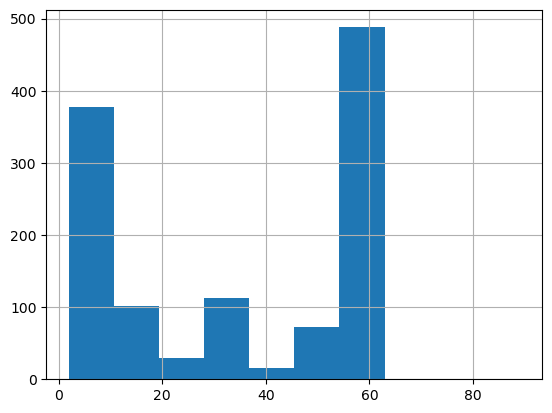

In [23]:
df["no_of_workers"].hist()

## Dataset Cleaning

We will fix the 'department' column

In [24]:
df['department'].unique()

array(['sweing', 'finishing ', 'finishing'], dtype=object)

In [25]:
df.loc[df['department']=='finishing ', 'department'] = 'finishing'
df['department'].unique()

array(['sweing', 'finishing'], dtype=object)

We will fix the 'quarter' column: we will move the observations with the quarter 5 to the quarter 4 and will change the type of the values into integers.

In [26]:
df.loc[df['quarter']=='Quarter1', 'quarter'] = 1
df.loc[df['quarter']=='Quarter2', 'quarter'] = 2
df.loc[df['quarter']=='Quarter3', 'quarter'] = 3
df.loc[df['quarter']=='Quarter4', 'quarter'] = 4
df.loc[df['quarter']=='Quarter5', 'quarter'] = 4

In [27]:
df['quarter'].value_counts()

1    360
2    335
4    292
3    210
Name: quarter, dtype: int64

In [28]:
df['quarter'] = df['quarter'].astype("int")

In [29]:
df['quarter'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1197 entries, 0 to 1196
Series name: quarter
Non-Null Count  Dtype
--------------  -----
1197 non-null   int32
dtypes: int32(1)
memory usage: 4.8 KB


We will drop the 'date' column, because it has values only of three months and can´t demonstrate seasonal fluctuations

In [30]:
df = df.drop('date', axis=1)

Also we will drop the wip column because of the cuantity of empty values.

In [31]:
df = df.drop('wip', axis=1)

Let´s also change the type of 'no_of_workers' column.

In [32]:
df["no_of_workers"] = df["no_of_workers"].astype("int")

Let´s round 'actual productivity' to two decimals

In [33]:
df['actual_productivity'] = round(df['actual_productivity'], 2)

In [34]:
df.head()

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1,sweing,Thursday,8,0.80,26.16,7080,98,0.0,0,0,59,0.94
1,1,finishing,Thursday,1,0.75,3.94,960,0,0.0,0,0,8,0.89
2,1,sweing,Thursday,11,0.80,11.41,3660,50,0.0,0,0,30,0.80
3,1,sweing,Thursday,12,0.80,11.41,3660,50,0.0,0,0,30,0.80
4,1,sweing,Thursday,6,0.80,25.90,1920,50,0.0,0,0,56,0.80


For the purposes of classification we need to creat a column with classes

In [35]:
df['productive'] = df['actual_productivity']>=df['targeted_productivity']

In [36]:
df.head()

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,productive
0,1,sweing,Thursday,8,0.80,26.16,7080,98,0.0,0,0,59,0.94,True
1,1,finishing,Thursday,1,0.75,3.94,960,0,0.0,0,0,8,0.89,True
2,1,sweing,Thursday,11,0.80,11.41,3660,50,0.0,0,0,30,0.80,True
3,1,sweing,Thursday,12,0.80,11.41,3660,50,0.0,0,0,30,0.80,True
4,1,sweing,Thursday,6,0.80,25.90,1920,50,0.0,0,0,56,0.80,True


Let´s convert categorical columns into numerical

In [37]:
df['department'].replace({'finishing': 0, 'sweing': 1}, inplace=True)

In [38]:
df.rename(columns = {'department': 'department_sweing'}, inplace=True)

In [39]:
df = pd.concat([df, pd.get_dummies(df['quarter'], prefix='quarter')], axis=1).drop('quarter', axis=1)

In [40]:
df = pd.concat([df, pd.get_dummies(df['day'], prefix='day')], axis=1).drop('day', axis=1)

In [41]:
df = pd.concat([df, pd.get_dummies(df['team'], prefix='team')], axis=1).drop('team', axis=1)

In [42]:
df.head()

,department_sweing,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,...,team_3,team_4,team_5,team_6,team_7,team_8,team_9,team_10,team_11,team_12
0,1,0.80,26.16,7080,98,0.0,0,0,59,0.94,...,0,0,0,0,0,1,0,0,0,0
1,0,0.75,3.94,960,0,0.0,0,0,8,0.89,...,0,0,0,0,0,0,0,0,0,0
2,1,0.80,11.41,3660,50,0.0,0,0,30,0.80,...,0,0,0,0,0,0,0,0,1,0
3,1,0.80,11.41,3660,50,0.0,0,0,30,0.80,...,0,0,0,0,0,0,0,0,0,1
4,1,0.80,25.90,1920,50,0.0,0,0,56,0.80,...,0,0,0,1,0,0,0,0,0,0


## Building the Tree

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [44]:
X = df.drop(['actual_productivity', 'productive'], axis=1)
y = df['productive']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, shuffle = True, test_size=0.3)

First of all we will search for the best ccv_alpha parameter of the tree:

In [46]:
cost_tree = DecisionTreeClassifier(random_state = 1)
cost_path = cost_tree.cost_complexity_pruning_path(X_train, y_train)
cost_path.ccp_alphas
subtrees = []
for alpha in cost_path.ccp_alphas:
    subtree = DecisionTreeClassifier(random_state = 1, ccp_alpha = alpha)
    subtree.fit(X_train, y_train)
    subtrees.append(subtree)
ccp_alphas_slice = cost_path.ccp_alphas[-10:-3]
subtrees_slice = subtrees[-10:-3] # Both slices are required to match.
subtree_scores = [subtree.score(X_test, y_test) for subtree in subtrees_slice]
alpha_scores = tuple(zip(ccp_alphas_slice, subtree_scores))
print(max(alpha_scores, key=lambda x:x[1]))

(0.0037220843672456584, 0.8166666666666667)


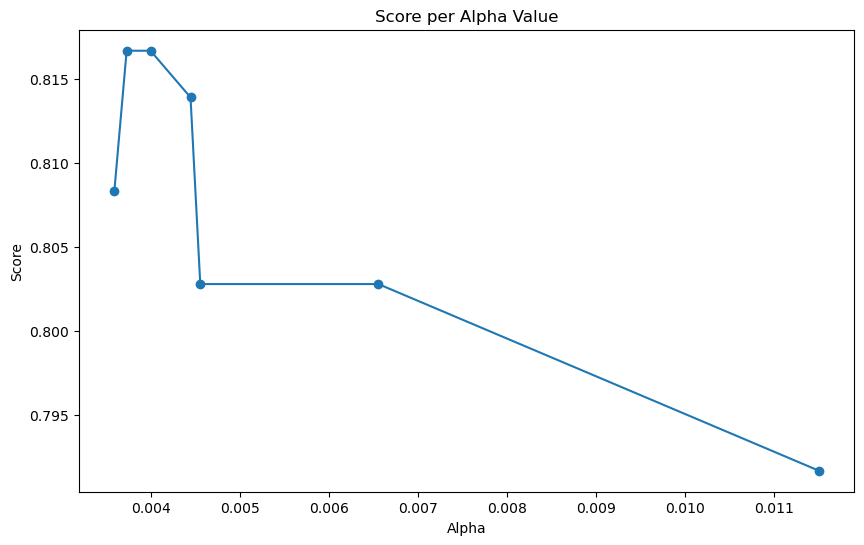

In [47]:
plt.rcParams["figure.figsize"] = [10.0, 6.0]
fig, ax = plt.subplots()
ax.set_xlabel("Alpha")
ax.set_ylabel("Score")
ax.set_title("Score per Alpha Value")
ax.plot(ccp_alphas_slice, subtree_scores, marker="o")
plt.show()

We will use this alpha in our tree. Ccv_alpha regulates pruning of the tree by applying penalties on the overfitted trees.

In [48]:
tree = DecisionTreeClassifier(max_depth=5, random_state=1, ccp_alpha=0.00372)

In [49]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.00372, max_depth=5, random_state=1)

In [50]:
y_pred = tree.predict(X_test)

In [51]:
from sklearn.metrics import accuracy_score

In [52]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy is {round(accuracy, 3)}')

Accuracy is 0.808


## Visualizing the Tree

In [53]:
tree.classes_

array([False,  True])

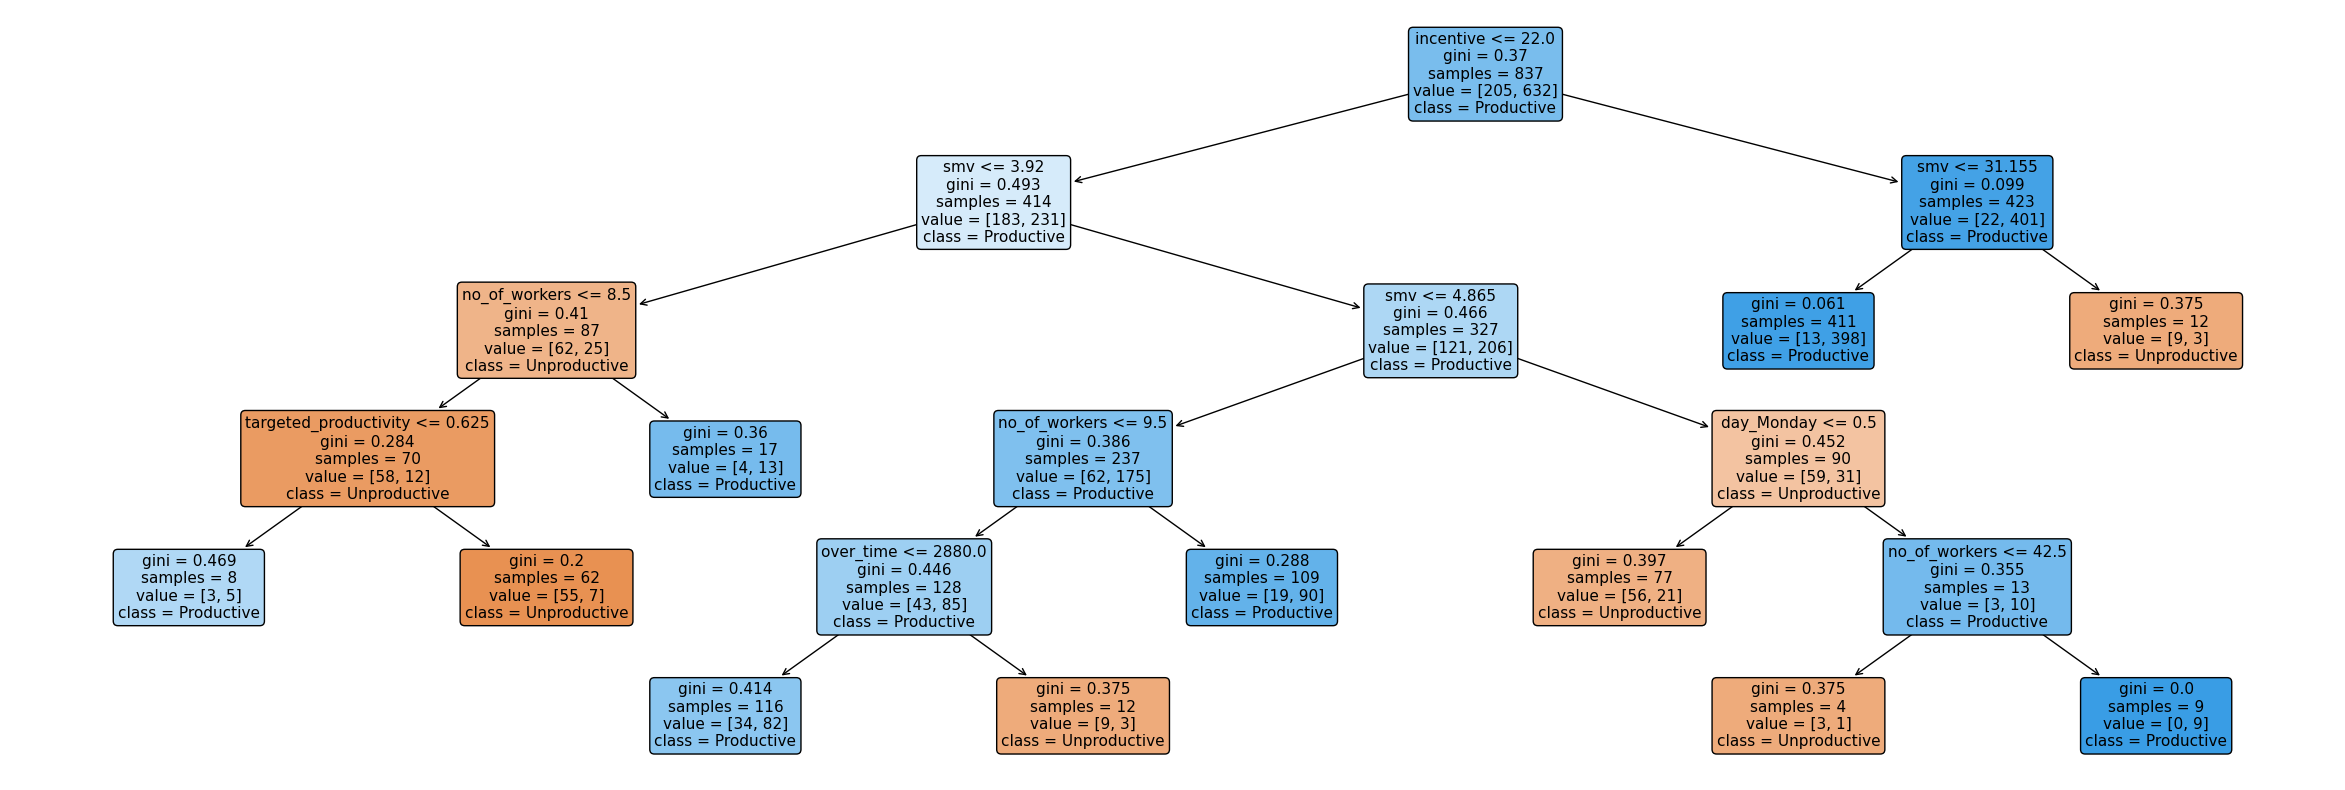

In [54]:
plt.figure(figsize=[30, 10])
_ = plot_tree(tree,
              feature_names = X.columns,
              class_names = ['Unproductive', 'Productive'],
              filled = True,
              rounded = True,
              proportion = False,
              fontsize = 11
             )

We can see that the most significant columns are: 'incentive', 'smv' (Standard Minute Value, or the allocated time for a task), no_of_workers.

Example of the apllying of the tree in order to predict the productivity: 
If we aasume that the incentive is 25 and smv=40, then in the first node 'incentive <=22,0' evaluates to False and we follow the right branch. After that 'smv<=31.155' also evaluates to False and we go along the right branch again and arrive to the leaf "Unproductive".

Importance of different columns can be estimated better with the following plot:

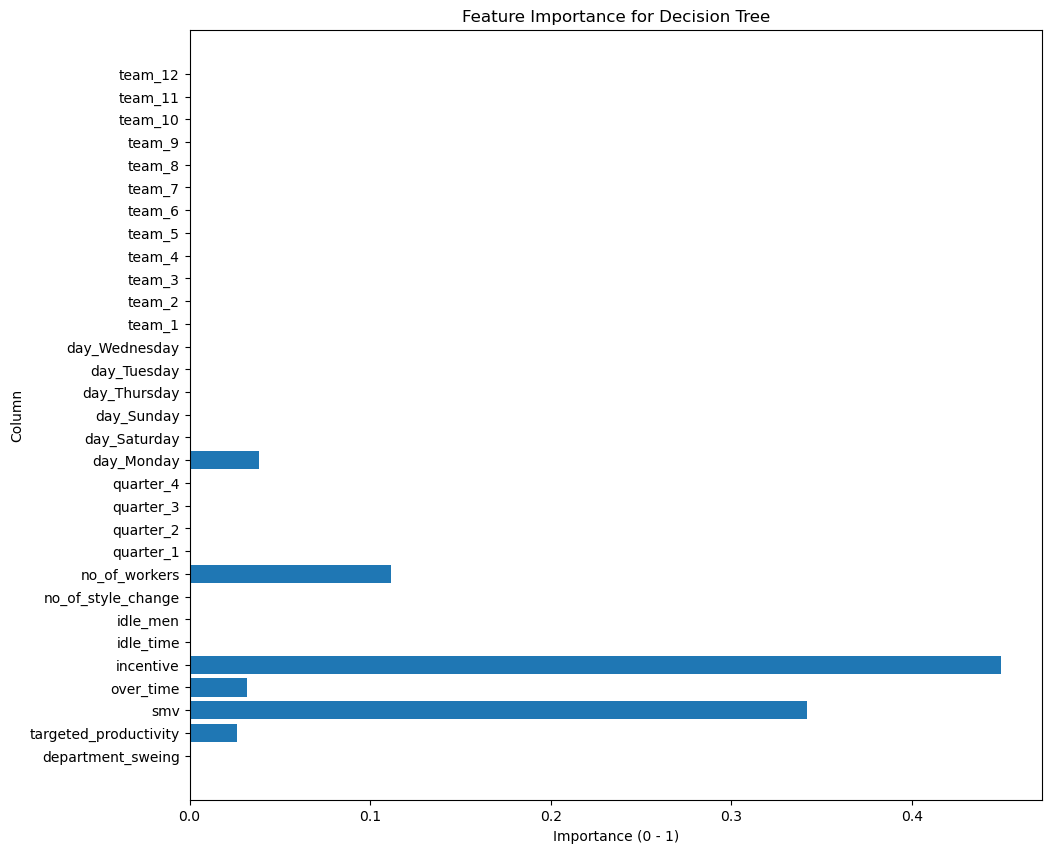

In [55]:
plt.rcParams["figure.figsize"] = [11.0, 10.0]
plt.barh(tree.feature_names_in_, tree.feature_importances_)
plt.xlabel("Importance (0 - 1)")
plt.ylabel("Column")
plt.title("Feature Importance for Decision Tree")
plt.show()

## Evaluating the tree

In [56]:
from sklearn.metrics import confusion_matrix

In [57]:
confusion_matrix(y_test, y_pred)

array([[ 52,  45],
       [ 24, 239]], dtype=int64)

True Negatives, False Positives,

False Negatives, True Positives

In [58]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [59]:
print("Precision:", round(precision_score(y_test, y_pred), 2))

Precision: 0.84


Precision = TP/(TP+FP)

In [60]:
print("Recall:", round(recall_score(y_test, y_pred), 2))

Recall: 0.91


Recall = TP/(TP+FN)

In [61]:
print("F1 score:", round(f1_score(y_test, y_pred), 2))

F1 score: 0.87


F1 = 2*(Precision*Recall)/(Precision+Recall)

In [62]:
print("Accuracy:", round(tree.score(X_test, y_test), 2))

Accuracy: 0.81


We can see all this information together:

In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.68      0.54      0.60        97
        True       0.84      0.91      0.87       263

    accuracy                           0.81       360
   macro avg       0.76      0.72      0.74       360
weighted avg       0.80      0.81      0.80       360



Let´s evaluate the tree with cross validation. It consistns in dividing the original dataset in various pairs of training and testing sets. So we can estimate whether our scores stands out.

In [64]:
from sklearn.model_selection import cross_val_score

In [65]:
scores = cross_val_score(tree, X, y, cv=10)

In [66]:
print("Cross Validation Accuracy Scores:", scores.round(2)) 

Cross Validation Accuracy Scores: [0.85 0.88 0.82 0.83 0.84 0.82 0.72 0.76 0.83 0.76]


In [67]:
print("Mean Cross Validation Score:", scores.mean().round(2))

Mean Cross Validation Score: 0.81


## Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
random_forest_clf = RandomForestClassifier(random_state=1)
random_forest_clf.fit(X_train, y_train)
print("Accuracy: ", round(random_forest_clf.score(X_test, y_test), 2))

Accuracy:  0.83


In [70]:
random_forest_clf = RandomForestClassifier(random_state=1, bootstrap=True, oob_score=True)
random_forest_clf.fit(X, y)
print("Accuracy with out-of-bag: ", round(random_forest_clf.oob_score_, 2))

Accuracy with out-of-bag:  0.84


The results of random forest are similar to those we obtained with our decision tree. 

Because of their tendency to overfit the data, it's always considered good practice to double-check Trees with a Random Forest.

## Explaining the results

In [71]:
tree.classes_ # We'll transform them to ["Unproductive", "Productive"]

array([False,  True])

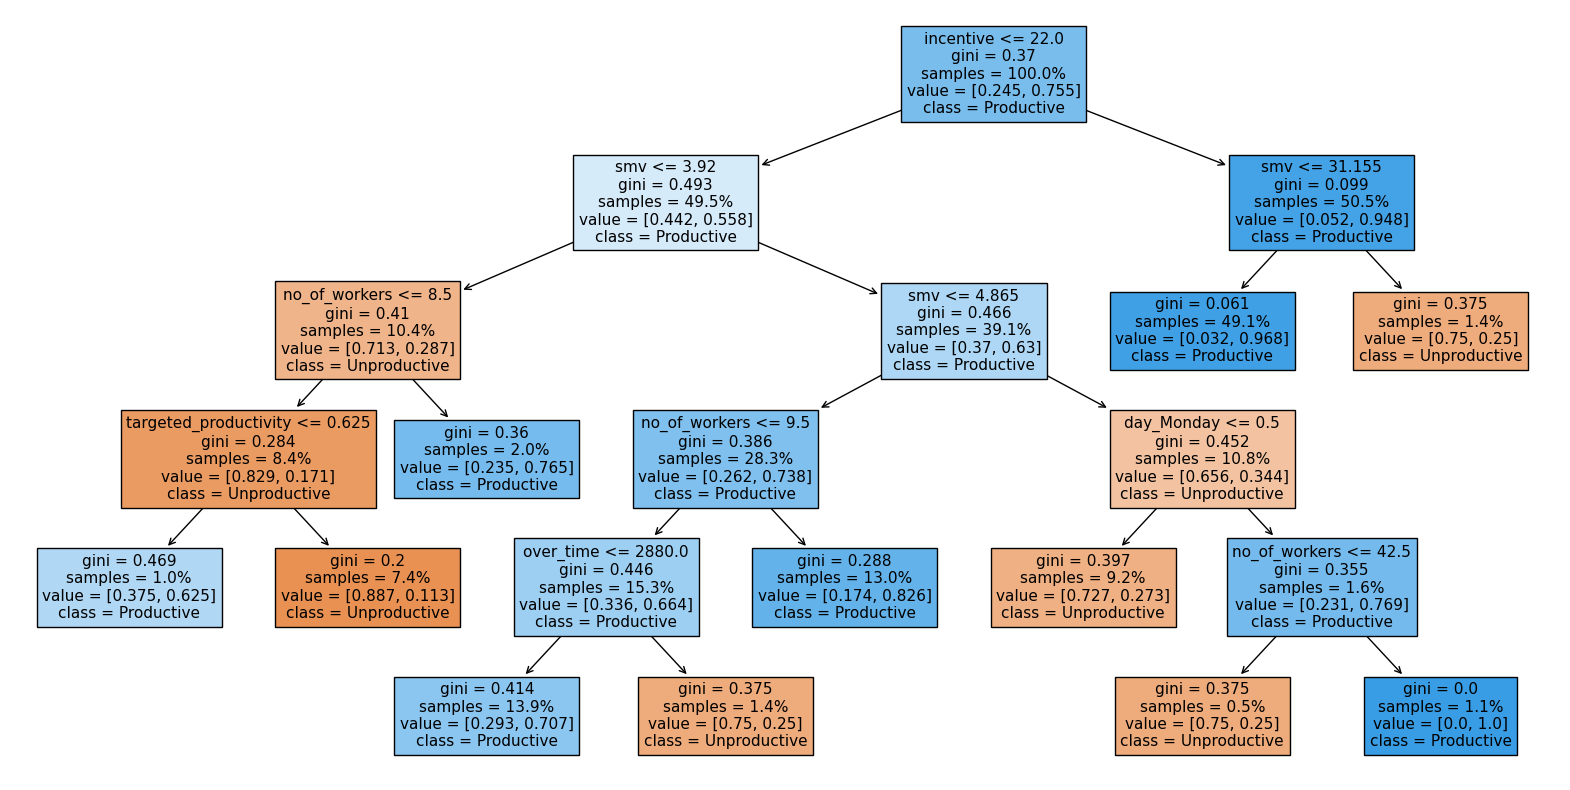

In [72]:
plt.figure(figsize = [20.0, 10.0])

_ = plot_tree(tree, 
              feature_names = X.columns, 
              class_names = ["Unproductive", "Productive"],
              filled = True, 
              rounded = False, 
              proportion = True, 
              fontsize = 11) 

In [73]:
print("Accuracy of the model (predictive power):", round(tree.score(X_test, y_test)*100, 0), "%")

Accuracy of the model (predictive power): 81.0 %


Example of presentation: "The graphic above was created using predictions produced by the algorithm we implemented — a Decision Tree. We chose this algorithm because, despite how intimidating the graphic appears to be, we'll have you interpreting the results in just a few minutes!

The graphic illustrates which aspects of the factory are best at predicting if a team will be productive or not. When we say aspects, we mean variables like the date, department, team number, etc. In our case, we discovered that the "incentive" and the "smv" variables were the ones with the greatest influence on the final prediction. To provide context, the "incentive" variable represents the amount of financial incentive offered to motivate a particular course of action. The "smv" (Standard Minute Value) variable represents the time allocated for a specific task.The next less important variable is "no_of_workers" (number of workers in a team).

How do we know that these two variables are the most predictive? We know this because of the information included in the square boxes in the graphic! For example, if we focus on the top part of each box, we will see that those two variables are the ones that appear most frequently. 

You may be wondering why the algorithm is called a Decision Tree. Well, you can think of the graphic as an inverted tree with the top box, called the "root", representing the most predictive feature and the boxes at the bottom, called the "leaves", which provide the predictions. These final boxes (leaves) are the ones that tell us whether a team in a specific department was productive or not. The prediction is shown in the "class" component at the bottom of the box. Keep in mind, even though all boxes feature a "class" component, we are only interested in the classes found in a leaf, not before.

"But how do I know which path to take from the top box to the final ones?" you might ask. Good question! Basically, we need to use the thresholds associated with every variable at the top of every square box. We have to compare our inputs with those thresholds – starting from the root – until we reach the leaves at the bottom. When we say "input" we are referring to the corresponding "incentives" and "smv" values for a particular team. We can obtain these values from any date we choose in the dataset or we can select the values ourselves to test hypothetical situations. This is excellent for us since it means we can use the Decision Tree to predict the outcome for future and/or hypothetical scenarios so long as we have their respective incentive and SMV values.

We get it, that last part was a bit overwhelming, so to show you how all this works, let's use an example: a fictional date where the "incentive" is 22, "smv" is 3.44 and "number of workers" is 10 to predict if a team will be productive or not under these conditions. Starting from the root, we see that our first comparison will be 22 <= 22 when we substitute "incentive" for 22.

So, is 22 less than or equal to 22? Yes! Since the assertion is True, we follow the arrow to the lower left box. This is a universal rule of Decision Trees: if the assertion is True, we continue to the left; otherwise, if it's False, we continue to the right.

True = Left. False = Right.

Now we repeat the process for the rest of the boxes. We apply the same approach to the next box, which has the comparrison 3.44 <= 3.92 after we substitute "smv" for 4.44.

So, is 3.44 less than or equal to 3.92? Yes! Since the assertion is True, we again follow the arrow to the lower left box. 

Now we will look at the number of workers. Is 10 <= than 8.5? No, it isn´t! So we should go down by the right branch, coming to the leaf, which predicts the team will be "Productive". In other words, if we have a team with an "incentive" of 22, a SMV of 3 and number of workers of 10, it will be a productive team!

To summarize, the Decision Tree not only told us which variables have the strongest predictive power ("incentive", "smv" and "no_of_workers"), but it also allows us to make predictions using values of our own choosing. This is the power of Decision Trees! 

Besides, we have a metric, "Accuracy", wich evaluates the performance of the model and says that in 81% of cases it will predict the productivity correctly."